<h2><b> Diamond Price Prediction

This project is to build a decision tree regression model to predict diamond prices with 96.4% accuracy. The model will use a data set of 43,152 diamonds to figure out the relationship between price and factors such as carat weight, cut, color, clarity, depth, and scale. The model can be used to predict the price of new diamonds, which can be useful to jewelers and diamond buyers.

<h3><b>Imports Packages

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

<h3><b> Read the Data

In [154]:
# the data frrom kaggle
df = pd.read_csv('/content/train.csv')
test=pd.read_csv("/content/test.csv")

<H3><b> EDA

In [155]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50




*   No missing data
*   10 columns , 43152 rows



In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [157]:
# Remove rows containing 0 value
df[['z','y', 'x']] = df[['z','y', 'x']].replace(0, np.nan)
df.dropna(inplace=True)




*   descriptive statistics for each column of the DataFrame




In [158]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,21577.642796,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,12456.553482,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10789.500000,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,21578.000000,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,32364.500000,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [159]:
df.shape

(43135, 11)

<h1>Data Analysis and Data Visualization


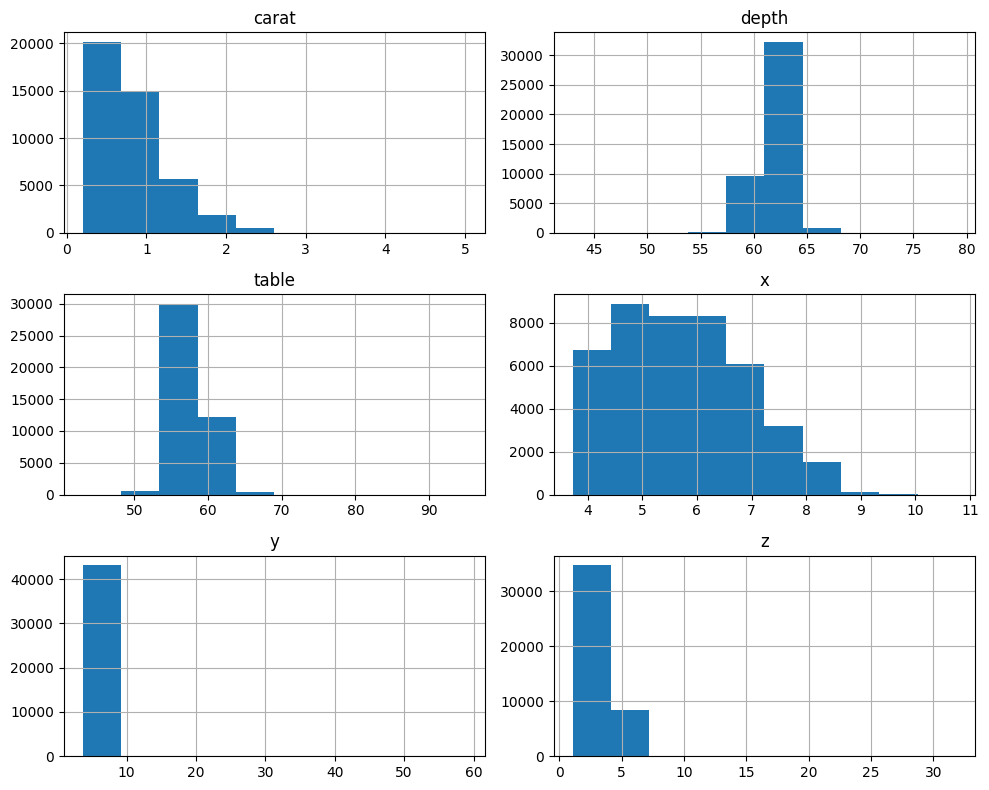

In [160]:
# plot histograms of carat weight, depth, table, and dimensions
df[['carat', 'depth', 'table', 'x', 'y', 'z']].hist(figsize=(10,8))
plt.tight_layout()
plt.show()


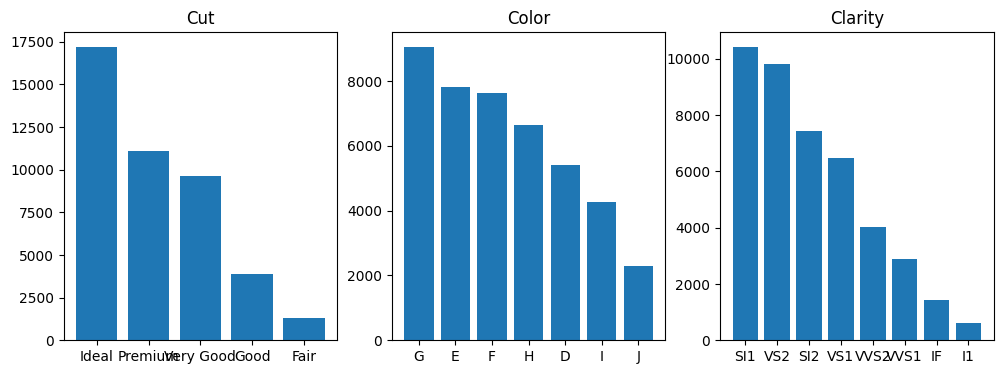

In [161]:
# count the number of diamonds for each cut, color, and clarity grade
cut_counts = df['cut'].value_counts()
color_counts = df['color'].value_counts()
clarity_counts = df['clarity'].value_counts()

# plot the count of diamonds for each grade using a bar chart
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].bar(cut_counts.index, cut_counts.values)
axs[0].set_title('Cut')
axs[1].bar(color_counts.index, color_counts.values)
axs[1].set_title('Color')
axs[2].bar(clarity_counts.index, clarity_counts.values)
axs[2].set_title('Clarity')
plt.show()


<ipython-input-162-4d889c9814ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['carat', 'price', 'cut']].corr()


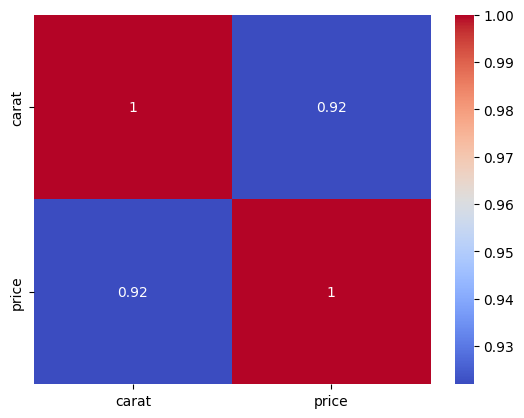

In [162]:
# compute the pairwise correlation matrix
corr_matrix = df[['carat', 'price', 'cut']].corr()

# plot the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


<ipython-input-163-b54177d2bf1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


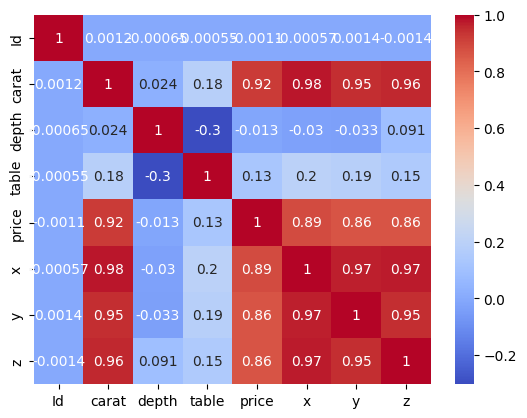

In [163]:
# compute the pairwise correlation matrix for all columns
corr_matrix = df.corr()

# plot the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


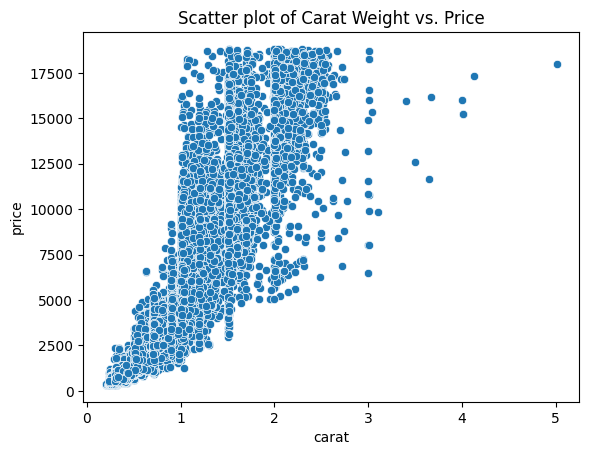

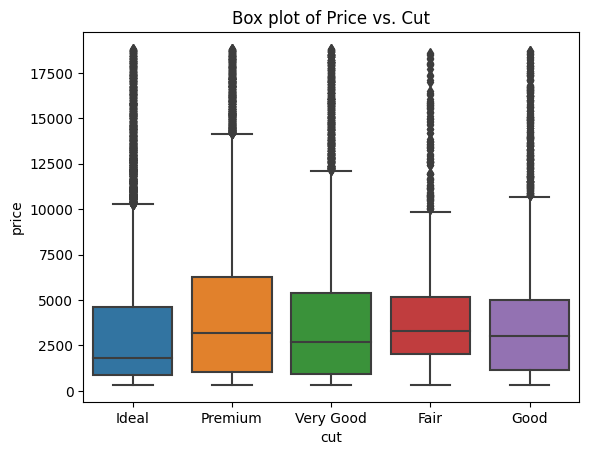

In [164]:
# scatter plot of carat weight vs. price
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Scatter plot of Carat Weight vs. Price')
plt.show()

# box plot of price vs. cut
sns.boxplot(x='cut', y='price', data=df)
plt.title('Box plot of Price vs. Cut')
plt.show()


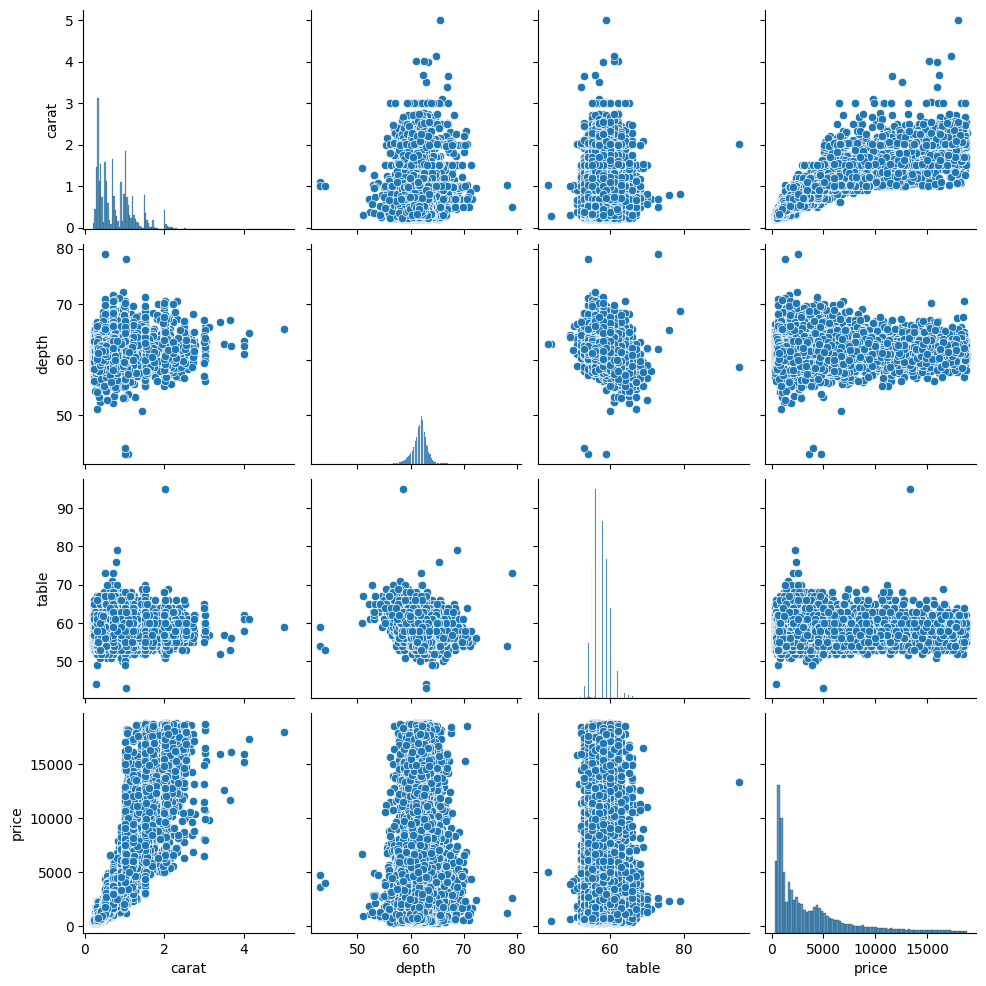

In [165]:

sns.pairplot(df[['carat', 'depth', 'table', 'price']])

<h1> Build and Evaluation the model

Label encoding

In [166]:
# Encode categorical columns using LabelEncoder
cat_cols = ['color', 'clarity','cut']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


Handle Outliers

In [167]:
cols = ['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price','x', 'y', 'z']

# Calculate the IQR for each column
q1 = df[cols].quantile(0.25)
q3 = df[cols].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Find rows that have outlier values
outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)].any(axis=1)

# Remove the rows that have outlier values
df= df[~outliers]


Featuer Scaling

In [168]:
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

<ipython-input-168-e856b076f128>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = scaler.fit_transform(df[num_cols])


Featuer Selection

In [169]:
X = df[['Id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z']]
y = df['price']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Linear Regression Model

In [170]:
# Train the model 100 times on different subsets of the data and calculate accuracy and error rate
accuracy_scores = []
error_rates = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = mse / y_test.mean()
    accuracy_scores.append(accuracy)
    error_rates.append(error_rate)

print("Average accuracy over 100 iterations:", sum(accuracy_scores) / len(accuracy_scores))
print("Average error rate over 100 iterations:", sum(error_rates) / len(error_rates))


Average accuracy over 100 iterations: 0.8893244838198743
Average error rate over 100 iterations: 267.8978141367919


Decision Tree Regressor Model

In [171]:
# Train the model 100 times on different subsets of the data and calculate accuracy and error rate
accuracy_scores = []
error_rates = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model2 = DecisionTreeRegressor()
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy = model2.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = mse / y_test.mean()
    accuracy_scores.append(accuracy)
    error_rates.append(error_rate)

print("Average accuracy over 100 iterations:", sum(accuracy_scores) / len(accuracy_scores))
print("Average error rate over 100 iterations:", sum(error_rates) / len(error_rates))


Average accuracy over 100 iterations: 0.9648414704459601
Average error rate over 100 iterations: 85.33565905294068


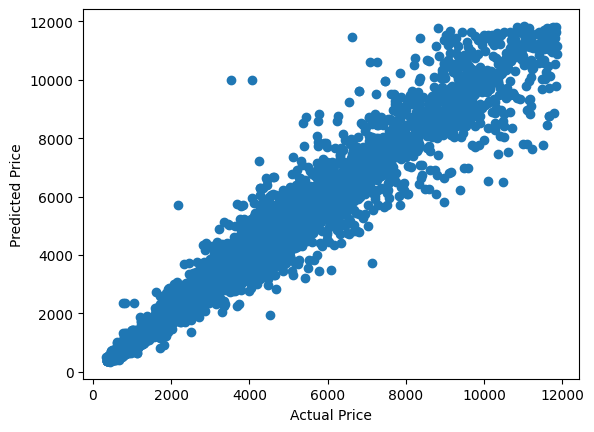

In [172]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Conclusion : The Decision Tree Regressor is the best regression with an accuracy 96.4%

<h1> predict target for new data

In [178]:
test_df= pd.read_csv("/content/test.csv")

In [179]:
cat_cols = ['color', 'clarity','cut']
le = LabelEncoder()
for col in cat_cols:
    test_df[col] = le.fit_transform(test_df[col])


In [180]:
# Scale the numeric columns
scaler_new = StandardScaler()
# Scale the numeric columns in test data using the same scaler object as before
test_df[num_cols_test] = scaler_new.fit_transform(test_df[num_cols_test])

In [184]:

# Select the features from the test data
X_new_test = test_df[['Id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z']]

# Predict prices using the trained model
y_pred_test = model2.predict(X_new_test)

# Create a new column in the test data for the predicted prices
test_df['predicted_price'] = y_pred_test

# Save the test data with the predicted prices to a CSV file
test_df.to_csv('predicted_prices.csv', index=False)

In [182]:
y_pred_test.shape

(10788,)

In [183]:
y_pred_test

array([1040., 2013.,  992., ..., 3181., 3752., 9229.])